In [1]:
from __future__ import print_function, division
from skimage import io, transform
from skimage.io import imread
from torch.autograd import Variable
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torchvision
from torchvision import transforms, utils
import matplotlib.pyplot as plt
import time
import os
import copy
import glob
from PIL import Image

In [2]:
data_dir = "/home/rishabh/Char_Dataset"  

In [3]:
path1 = "/home/rishabh/Char_Dataset/training/A/*.jpg"
file1 = glob.glob(path1)
a1 = []
for i in file1:
    a = imread(i)
    a1.append(a)
print("***1***")
# path2 = "/home/rishabh/Char_Dataset/training/E/*.jpg"
# file2 = glob.glob(path2)
# a2 = []
# for j in file2:
#     a = imread(j)
#     a2.append(a)
# print("***2***")
path3 = "/home/rishabh/Char_Dataset/training/F/*.jpg"
file3 = glob.glob(path3)
a3 = []
for k in file3:
    a = imread(k)
    a3.append(a)
print("***3***")
path4 = "/home/rishabh/Char_Dataset/training/H/*.jpg"
file4 = glob.glob(path4)
a4 = []
for l in file4:
    a = imread(l)
    a4.append(a)
print("***4***")

# path5 = "/home/rishabh/Char_Dataset/training/I/*.jpg"
# file5 = glob.glob(path5)
# a5 = []
# for l in file4:
#     a = imread(l)
#     a5.append(a)
    
# print("***5***")

path6 = "/home/rishabh/Char_Dataset/training/L/*.jpg"
file6 = glob.glob(path6)
a6 = []
for l in file6:
    a = imread(l)
    a6.append(a)
print("***6***")

    
# path7 = "/home/rishabh/Char_Dataset/training/M/*.jpg"
# file7 = glob.glob(path4)
# a7 = []
# for l in file7:
#     a = imread(l)
#     a7.append(a)
    
# print("***7***")

path8 = "/home/rishabh/Char_Dataset/training/N/*.jpg"
file8 = glob.glob(path8)
a8 = []
for l in file8:
    a = imread(l)
    a8.append(a)   
    
print("***8***")

path9 = "/home/rishabh/Char_Dataset/training/T/*.jpg"
file9 = glob.glob(path9)
a9 = []
for l in file9:
    a = imread(l)
    a9.append(a)
    
print("***9***")

p0 = "/home/rishabh/Char_Dataset/training/X/*.jpg"
f0 = glob.glob(p0)
a0 = []
for l in f0:
    a = imread(l)
    a0.append(a)
    
print("***10***")

    
images = np.concatenate((a1,a3,a4,a6,a8,a9,a0),axis = 0).astype('float32')
#images = torch.tensor(images)
#images = images.permute(0,3,1,2)
#images = Image.fromarray(img)

***1***
***3***
***4***
***6***
***8***
***9***
***10***


In [4]:
a = np.zeros(6000)
b = np.ones(6000)
c = np.ones(6000)*2
d = np.ones(6000)*3
e = np.ones(6000)*4
f = np.ones(6000)*5
g = np.ones(6000)*6
# h = np.ones(6000)*7
# i = np.ones(6000)*8
# j = np.ones(6000)*9
labels = np.concatenate((a,b,c,d,e,f,g), axis= 0)

In [5]:
pa0 = "/home/rishabh/Char_Dataset/validation/A/*.jpg"
fa0 = glob.glob(pa0)
A0 = []
for l in fa0:
    A = imread(l)
    A0.append(A)
    
# P1 = "/home/rishabh/Char_Dataset/validation/E/*.jpg"
# f1 = glob.glob(P1)
# A1 = []
# for l in f1:
#     A = imread(l)
#     A1.append(A)

P2 = "/home/rishabh/Char_Dataset/validation/F/*.jpg"
f2 = glob.glob(P2)
A2 = []
for l in f2:
    A = imread(l)
    A2.append(A)
    
P3 = "/home/rishabh/Char_Dataset/validation/H/*.jpg"
f3 = glob.glob(P3)
A3 = []
for l in f3:
    A = imread(l)
    A3.append(A)


# P4 = "/home/rishabh/Char_Dataset/validation/I/*.jpg"
# f4 = glob.glob(P4)
# A4 = []
# for l in f4:
#     A = imread(l)
#     A4.append(A)

P5 = "/home/rishabh/Char_Dataset/validation/L/*.jpg"
f5 = glob.glob(P5)
A5 = []
for l in f5:
    A = imread(l)
    A5.append(A)

# P6 = "/home/rishabh/Char_Dataset/validation/M/*.jpg"
# f6 = glob.glob(P6)
# A6 = []
# for l in f6:
#     A = imread(l)
#     A6.append(A)

P7 = "/home/rishabh/Char_Dataset/validation/N/*.jpg"
f7 = glob.glob(P7)
A7 = []
for l in f7:
    A = imread(l)
    A7.append(A)
    
P8 = "/home/rishabh/Char_Dataset/validation/T/*.jpg"
f8 = glob.glob(P8)
A8 = []
for l in f8:
    A = imread(l)
    A8.append(A)

P9 = "/home/rishabh/Char_Dataset/validation/X/*.jpg"
f9 = glob.glob(P9)
A9 = []
for l in f9:
    A = imread(l)
    A9.append(A)

imgV = np.concatenate((A0,A2,A3,A5,A7,A8,A9), axis = 0).astype('float32')   #400x32x32x3
#imgV = Image.fromarray(ig)

In [6]:
Az = np.zeros(1001)
B = np.ones(1001)
C = np.ones(1001)*2
D = np.ones(1001)*3
E = np.ones(1001)*4
Fa = np.ones(1001)*5
G = np.ones(1001)*6
# H = np.ones(1001)*7
# I = np.ones(1001)*8
# J = np.ones(1001)*9

labV = np.concatenate((Az,B,C,D,E,Fa,G), axis= 0)     

In [7]:
print(labV.shape)

(7007,)


In [8]:
class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, label = sample['images'], sample['labels']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        image = image.transpose((2, 0, 1))
        return {'images': torch.from_numpy(image),
                'labels': torch.from_numpy(label)}

In [9]:
transform = transforms.Compose([transforms.Grayscale(num_output_channels=1), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),ToTensor()])

In [10]:
class ds(Dataset):
    def __init__(self, images, labels, transform = None):
        self.images = images
        self.labels = labels
        self.transform = transform
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self,idx):
        image = self.images[idx]
        label = self.labels[idx]
        #image = img.transpose((2,0,1))
        # sample = {'images': image,'labels':label }
        
        
        
       # print(image.dtype)
#         if self.transform:
#             img = torch.from_numpy(img)
#             sample = {'images':self.transform(img),'labels':label}  
        return image,label

In [11]:
trainset = ds(images,labels, transform = transform)
testset = ds(imgV, labV, transform = transform)
#print(trainset)


In [12]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size = 32,
                                        shuffle= True, num_workers=2)

In [13]:
a,b = iter(trainloader).next()
print(a.shape)

torch.Size([32, 32, 32])


In [14]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=3)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=3)
        self.conv3_drop = nn.Dropout2d()
        self.conv3 = nn.Conv2d(20, 30, kernel_size=3)
        self.conv4 = nn.Conv2d(30, 40, kernel_size=3)
        self.fc1 = nn.Linear(160, 84)
        self.fc2 = nn.Linear(84, 42)
        self.fc3 = nn.Linear(42,7)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))  #14,10
        x = F.relu(F.max_pool2d(self.conv2(x), 2))  #10,20
        x = F.relu(self.conv3_drop(self.conv3(x)))  #3,30
        x = F.relu(self.conv4(x))
        #x = F.relu(F.max_pool2d(self.conv3_drop(self.conv3(x), 2)))  #3,30
        x = x.view(-1, 160)
        x = F.relu(self.fc1(x))
        #x = F.dropout(x, training=self.training)
        x = F.relu(self.fc2(x))
        x1 = self.fc3(x)
        _,ind = torch.max(x1,1) 
        return x1,ind
net = Net()

In [ ]:
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(1, 10, kernel_size=5)   
#         self.conv2 = nn.Conv2d(10, 20, kernel_size=5)  
#         self.conv2_drop = nn.Dropout2d()
#         self.conv3 = nn.Conv2d(20, 30, kernel_size=5)
#         self.fc1 = nn.Linear(270, 120)
#         #self.fc2 = nn.Linear(200, 120)
#         self.fc2 = nn.Linear(120,84)
#         self.fc3 = nn.Linear(84,10)

#     def forward(self, x):
#         x = F.relu(F.max_pool2d(self.conv1(x), 2))
#         x = F.relu(self.conv2_drop(self.conv2(x)))  #10,20
#         x = F.relu(F.max_pool2d(self.conv3(x), 2))
#         x = x.view(-1, 270)
#         x = F.relu(self.fc1(x))
#         x = F.dropout(x, training=self.training)
#         x = F.relu(self.fc2(x))
#         #x = F.relu(self.fc3(x))
#         x1 = self.fc3(x)
#         _,ind = torch.max(x1,1) 
#         return x1,ind
# net = Net()

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [16]:
il = []
Vil = []
acc = []
Vacc = []
for epoch in range(20):
    running_loss = 0.0
    correct = 0
    iter_loss = 0    
    print('*******epoch:',epoch)
    for i,data in enumerate(trainloader,0):
        inputs,labels = data
#         inputs = Variable(inputs)
#         labels = Variable(labels)
        optimizer.zero_grad()
        #print('i',inputs.shape)
        inputs = inputs.unsqueeze(1)
        #inputs = inputs.transpose((1,0,2,3))
        #print('f',inputs.shape)
        outputs,ind = net(inputs)
        #print('o',outputs.shape)
        labels=labels.long()
#         print('o',outputs.shape)
#         print('l',labels.shape)
        loss = criterion(outputs, labels)
        l2_reg = None                   #regularization
        for w in net.parameters():
            if l2_reg is None:
                l2_reg = w.norm(2)
            else:
                l2_reg = l2_reg + w.norm(2)
        loss += 0.05 * l2_reg
        loss.backward()
        optimizer.step()
        correct += (ind == labels).float().sum()
        running_loss += loss.item()
        iter_loss += loss.item()
        if i % 200 == 199:    # print every 50 mini-batches
            print('[%d, %5d] trainng loss: %.3f' %(epoch + 1, i + 1, running_loss/200))
            running_loss = 0.0
    il.append((iter_loss/len(trainset)))   #training it_loss
    TrAccuracy = 100 * correct / len(trainset)
    print('Accuracy: %.3f' %(TrAccuracy))
    acc.append(TrAccuracy)
            
    
    Vit_loss = 0.0
    cor = 0
    for j,dat in enumerate(testloader,0):
        ip,lb = dat

        optimizer.zero_grad()
        ip = ip.unsqueeze(1)
        op,indi = net(ip)
        lb=lb.long()

        loss = criterion(op, lb)

        cor += (indi == lb).float().sum()
        Vit_loss += loss.item()
#         if j % 100 == 99:    # print every 100 mini-batches
#             print('[%d, %5d] ' %(epoch + 1, j + 1))
#             running_loss = 0.0
    Vil.append(Vit_loss/len(testset))  #validation it_loss
    accuracy = 100 * cor / len(testset)
    print('Validation Accuracy: %.3f' %(accuracy))
    Vacc.append(accuracy)
            
    

*******epoch: 0
[1,   200] trainng loss: 2.002
[1,   400] trainng loss: 1.418
[1,   600] trainng loss: 1.134
[1,   800] trainng loss: 0.976
[1,  1000] trainng loss: 0.795
[1,  1200] trainng loss: 0.724
Accuracy: 92.881
Validation Accuracy: 99.030
*******epoch: 1
[2,   200] trainng loss: 0.694
[2,   400] trainng loss: 0.621
[2,   600] trainng loss: 0.605
[2,   800] trainng loss: 0.659
[2,  1000] trainng loss: 0.678
[2,  1200] trainng loss: 0.586
Accuracy: 98.350
Validation Accuracy: 97.759
*******epoch: 2
[3,   200] trainng loss: 0.763
[3,   400] trainng loss: 0.618
[3,   600] trainng loss: 0.558
[3,   800] trainng loss: 0.659
[3,  1000] trainng loss: 0.643
[3,  1200] trainng loss: 0.574
Accuracy: 98.548
Validation Accuracy: 98.359
*******epoch: 3
[4,   200] trainng loss: 0.669
[4,   400] trainng loss: 0.600
[4,   600] trainng loss: 0.597
[4,   800] trainng loss: 0.569
[4,  1000] trainng loss: 0.578
[4,  1200] trainng loss: 0.611
Accuracy: 98.612
Validation Accuracy: 99.401
*******epoch

labels (31,)
[[2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 5 0 0 0 0]
 [0 0 0 7 0 0 0]
 [0 0 0 0 8 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 1 0 4]]


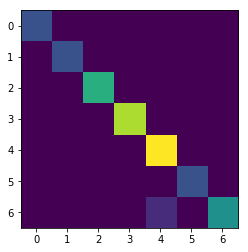

In [18]:
from sklearn.metrics import confusion_matrix 
op= op.detach().numpy()
oup = np.argmax(op, axis=1)
lb = lb.detach().numpy()
print('labels',lb.shape)
cm = confusion_matrix(lb,oup)
print(cm)
plt.imshow(cm)

In [ ]:
#torch.save(net.state_dict(),'/home/rishabh/TransferLearning/Models/Char_simple1/3_30.pth')

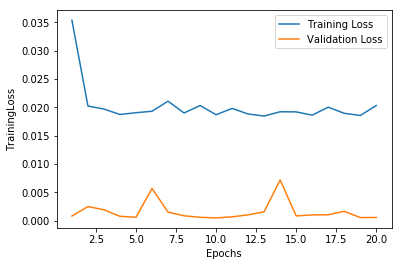

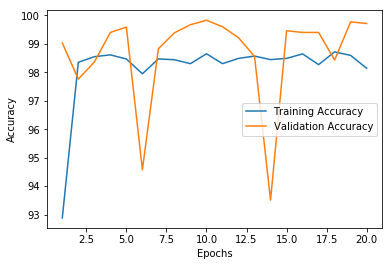

In [19]:
x = np.linspace(1,20,20)
plt.plot(x,il,label = 'Training Loss')
plt.plot(x,Vil,label = 'Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('TrainingLoss')
plt.legend()
#plt.savefig('/home/rishabh/TransferLearning/simple1/7.png')
plt.show()


plt.plot(x,acc,label = 'Training Accuracy')
plt.plot(x,Vacc,label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
#plt.savefig('/home/rishabh/TransferLearning/simple1/New2_accuracy_lr0.01_20.png')
plt.show()

In [ ]:
# np.savetxt('3SimpleTrLoss.txt',il)
# np.savetxt('3SimpleValLoss.txt',Vil)